In [1]:
#Import Libraries

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;"> Import necessary libraries and extract  data

In [2]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer
from scipy.stats import zscore
from sklearn import model_selection
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
bankData = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [4]:
bankData.shape

(5000, 14)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;"> 1. Read the column description and ensure you understand each attribute well 

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;"> Observations:
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;">    We have 13 independent variables and 1 dependent variable i.e. ‘Personal Loan’ in the data set. Also, we got 5000 rows which can be split into test & train datasets.

In [5]:
bankData.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
bankData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
bankData.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


<span style="font-family: Arial;font-size:1.5em;color:Red;"> Observation:
    
<span style="font-family: Arial;font-size:1em;color:Red;"> 
It got 7 numeric variables: ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’
<span style="font-family: Arial;font-size:1em;color:Red;">     
It got 2 categorical variables: ‘Education’, ‘Family’    
<span style="font-family: Arial;font-size:1em;color:Red;"> 
It got 5 Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’

In [8]:
# The first column is id column which is serial No for reacords and nothing to do with the model attriibutes. So drop it.

bankData = bankData.drop(labels = "ID", axis = 1)


In [9]:
bankData[bankData.Experience < 0]["Experience"].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [10]:
bankData["Experience"] = bankData["Experience"].apply(abs)

<span style="font-family: Arial;font-size:1.5em;color:Red;"> Observation:
    
<span style="font-family: Arial;font-size:1em;color:Red;"> 
    Filter the records matching the above criteria from the data frame which has records with negative experience 
and take the absolute.Apply the absolute back to the location which had negative experience to make it positive
    there are even no missing values.

In [11]:
bankData.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;"> 2. Study the data distribution in each attribute, share your findings 

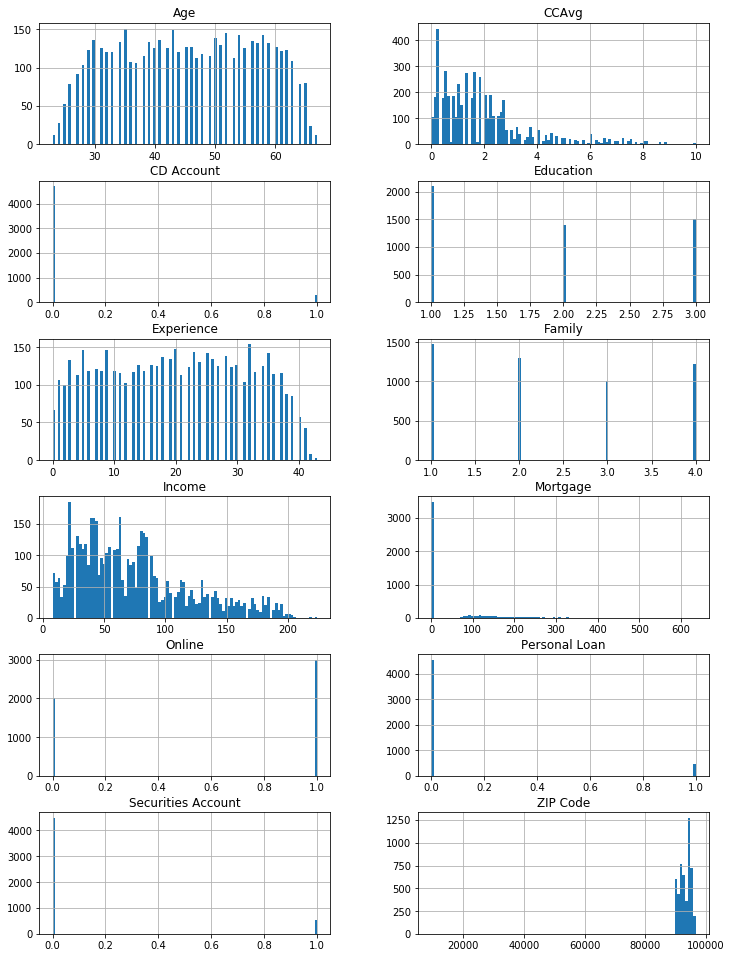

In [12]:
columns = list(bankData)[0:-1] # Excluding Outcome column which has only 
bankData[columns].hist(stacked=False, bins=100, figsize=(12,40), layout=(14,2)); 
# Histogram of first 8 columns
#Do correlation analysis and bivariate viualization with Insights

<span style="font-family: Arial;font-size:1.5em;color:Red;"> Observations:
    
    
<span style="font-family: Arial;font-size:1em;color:Red;"> high salaries are less feasible to buy personal loans while customers with medium or low salaries are more feasible for buying personal loans.
    
<span style="font-family: Arial;font-size:1em;color:Red;"> More the number of earning family members, less probability of buying personal loans.
    
<span style="font-family: Arial;font-size:1em;color:Red;"> Customers with probably the age of 30–50 will buy personal loans.
    
<span style="font-family: Arial;font-size:1em;color:Red;"> The customer is a graduate or under-graduate can affect the buying probability, people who are graduated or Advanced Professionals are more viable to buy personal loans from a bank rather than people who are under-graduated.

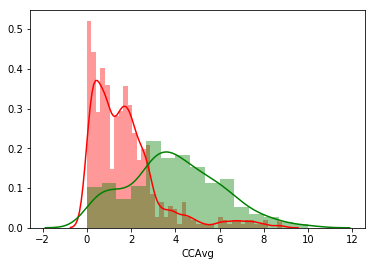

In [13]:
sns.distplot( bankData[bankData["Personal Loan"] == 0]['CCAvg'], color = 'r')
sns.distplot( bankData[bankData["Personal Loan"] == 1]['CCAvg'], color = 'g')

In [14]:
print('Credit card spending of Non-Loan customers: ',bankData[bankData["Personal Loan"] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', bankData[bankData["Personal Loan"] == 1]['CCAvg'].median()*1000)

('Credit card spending of Non-Loan customers: ', 1400.0)
('Credit card spending of Loan customers    : ', 3800.0)


<span style="font-family: Arial;font-size:1.5em;color:Red;"> Observation: 
    
 <span style="font-family: Arial;font-size:1em;color:Red;">The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

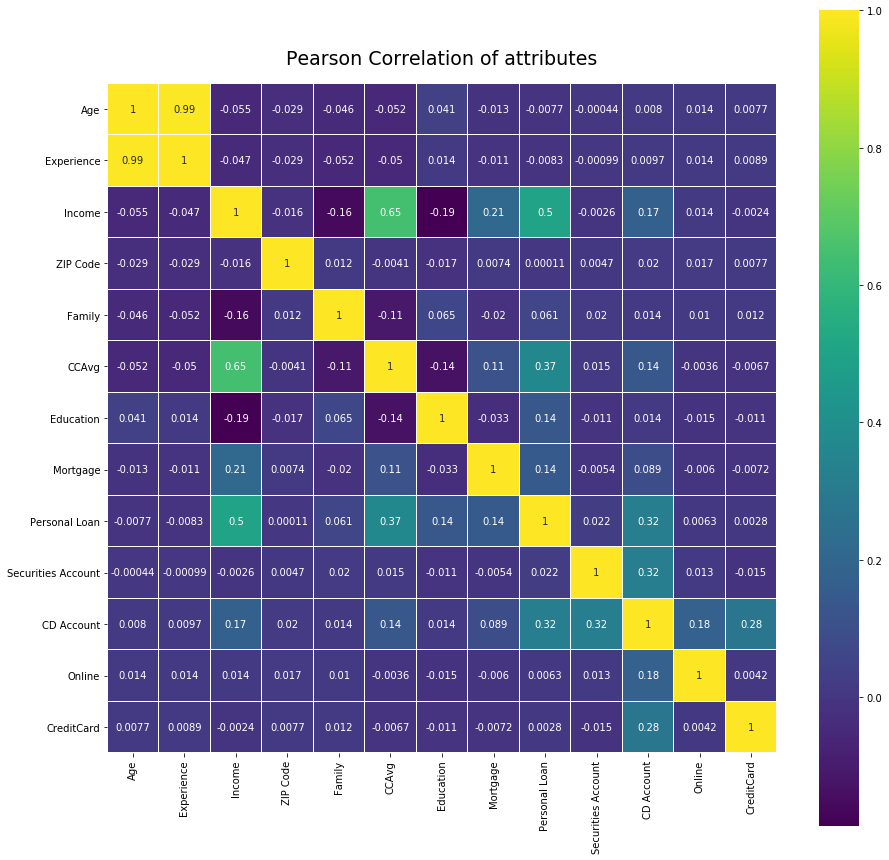

In [15]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.02, size=19)
sns.heatmap(bankData.corr(),linewidths=0.2,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
#There is no strong correlation between any two variables.
#There is no strong correlation between any independent variable and class variable.

<span style="font-family: Arial;font-size:1.5em;color:Red;"> Observation

<span style="font-family: Arial;font-size:1em;color:Red;"> 
    Income and CCAvg is moderately correlated.
 
 <span style="font-family: Arial;font-size:1em;color:Red;"> 
    Age and Experience is highly correlated

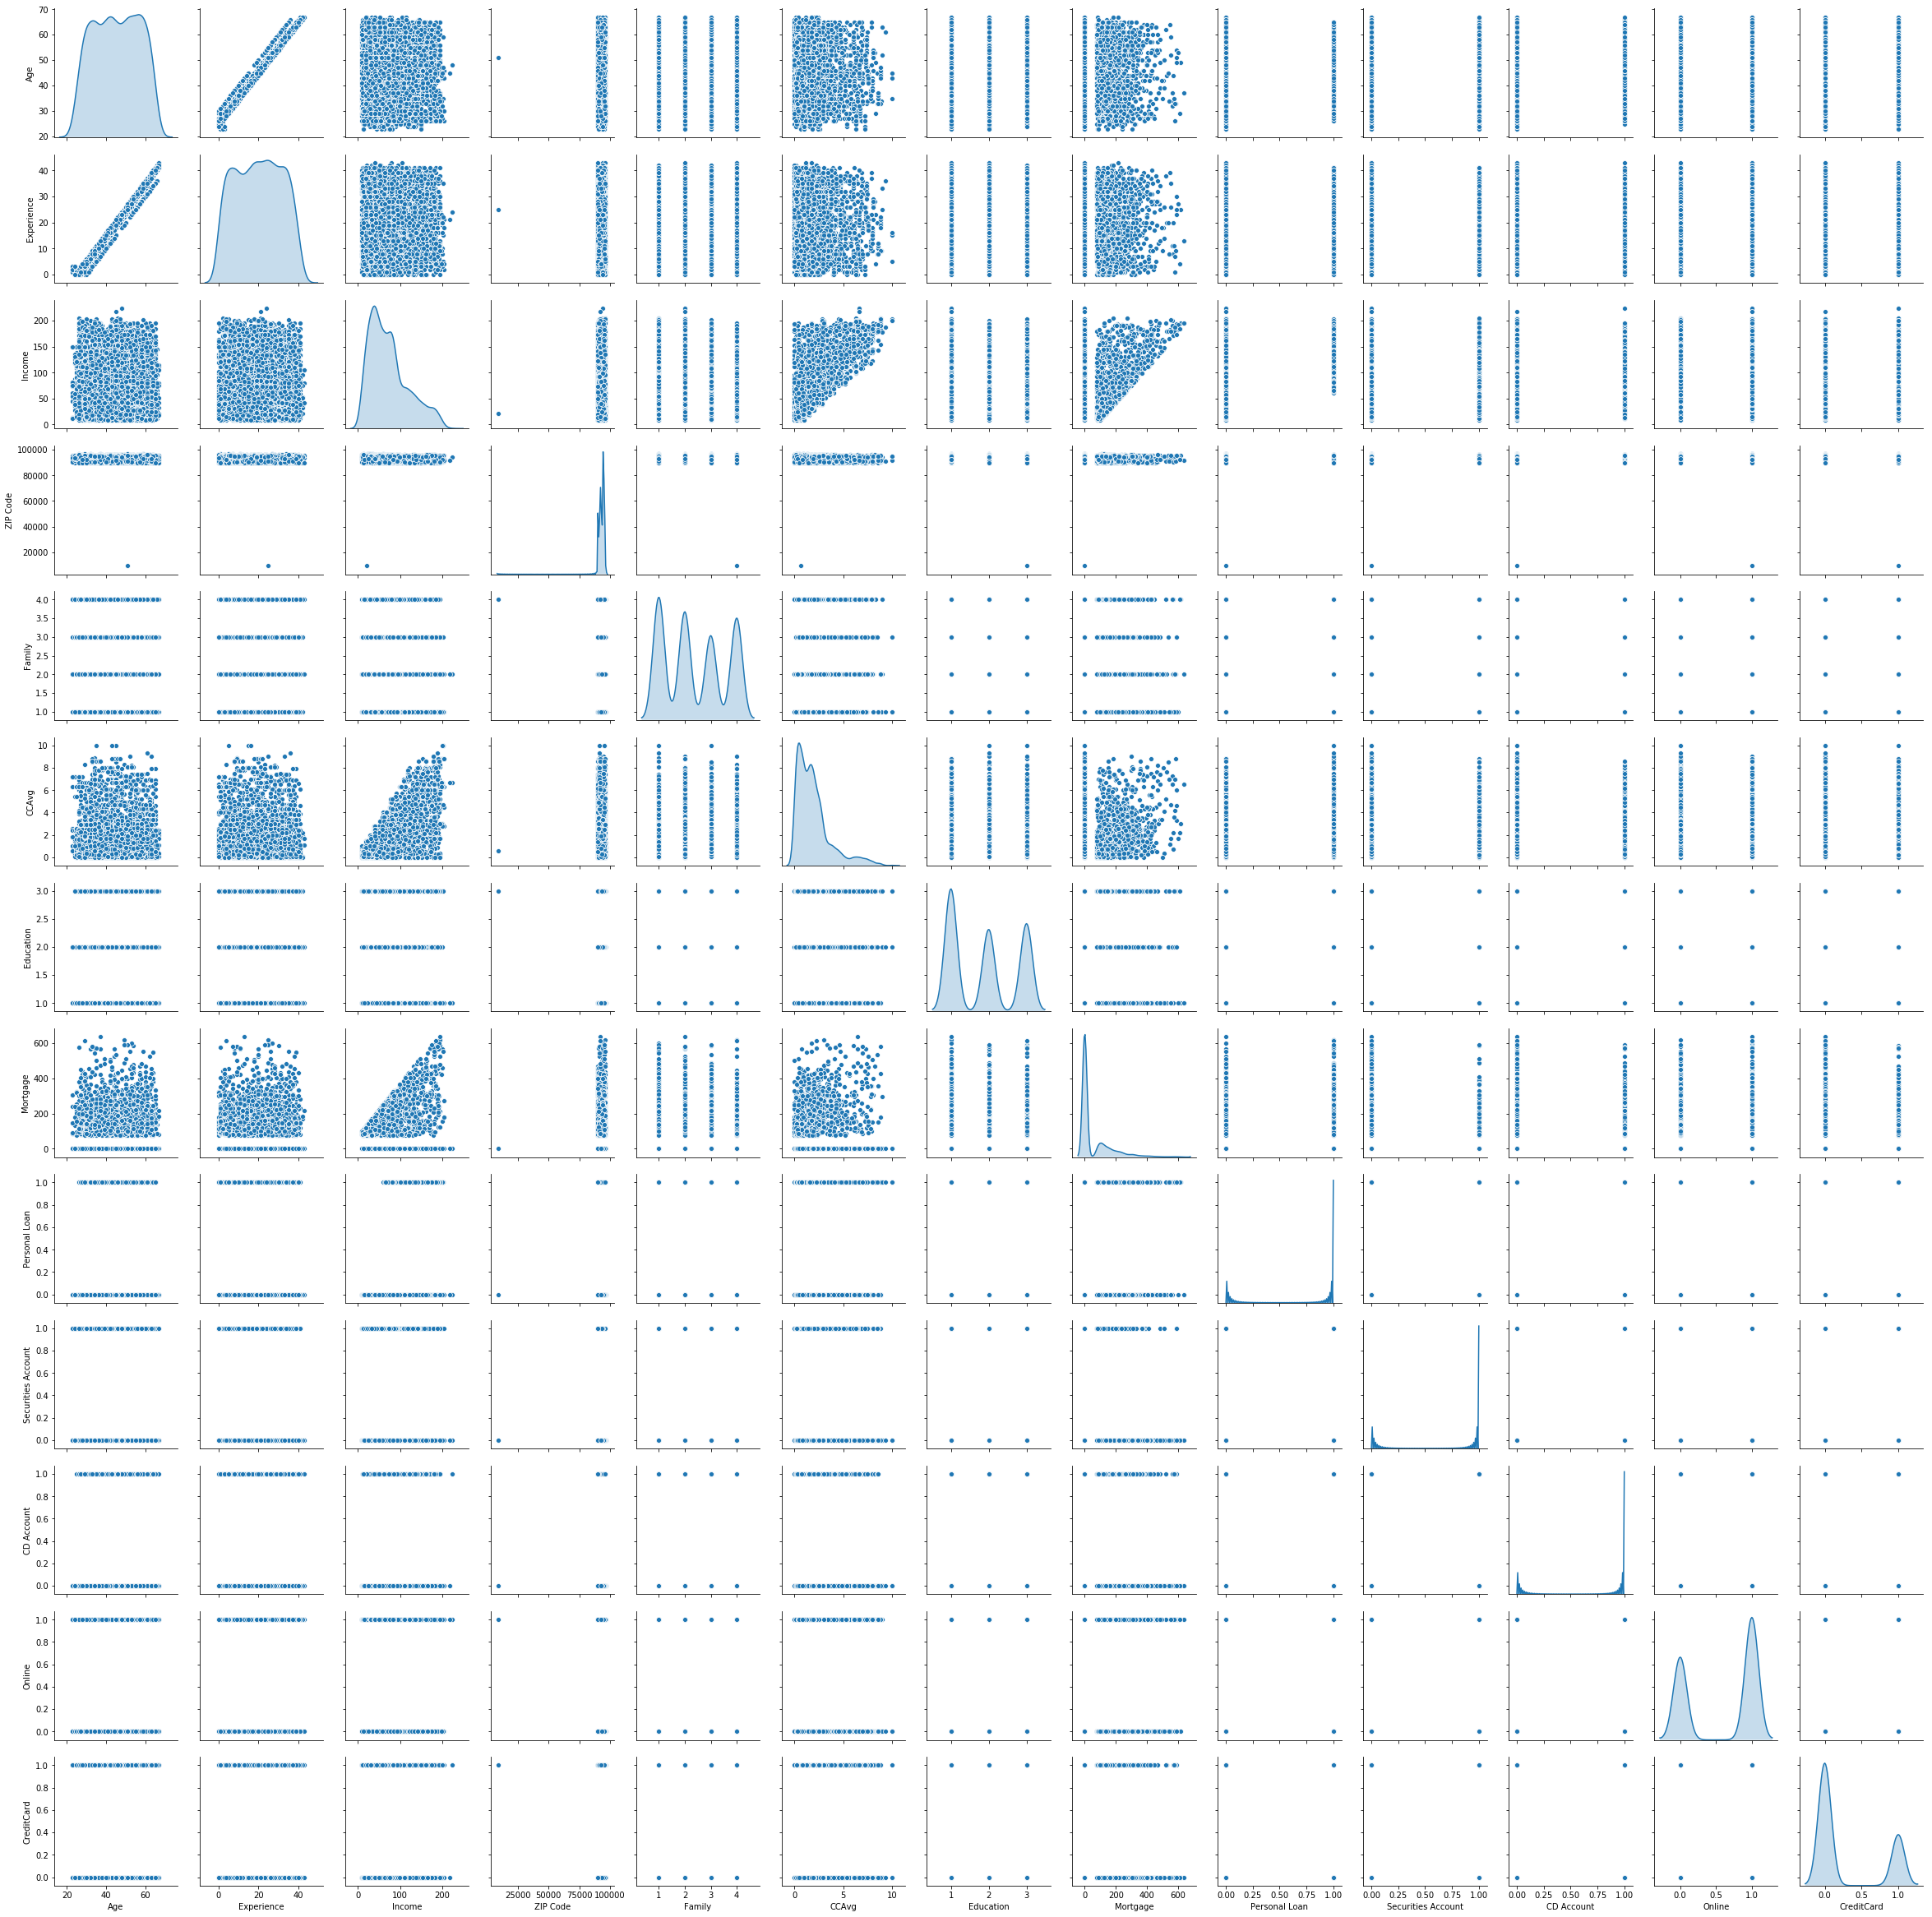

In [16]:
sns.pairplot(bankData,diag_kind='kde')

<span style="font-family: Arial;font-size:1.5em;color:red;"> Observations:

<span style="font-family: Arial;font-size:1em;color:red;"> 
    *Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

<span style="font-family: Arial;font-size:1em;color:red;"> 
    *Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.

<span style="font-family: Arial;font-size:1em;color:red;"> 
    *Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

<span style="font-family: Arial;font-size:1em;color:red;"> 
    *CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

<span style="font-family: Arial;font-size:1em;color:red;"> 
    *Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

<span style="font-family: Arial;font-size:1em;color:red;"> 
    *The variables family and education are ordinal variables. The distribution of families is evenly distributes

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;"> 3. Get the target column distribution

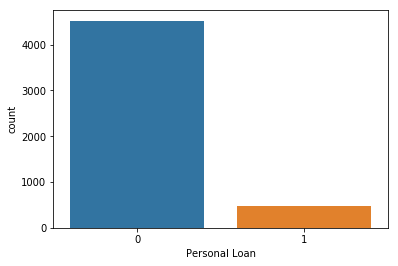

In [17]:
sns.countplot(bankData['Personal Loan'],label="Count")

<span style="font-family: Arial;font-size:1em;color:Royalblue;">    Education and Income relation on Personal Loan

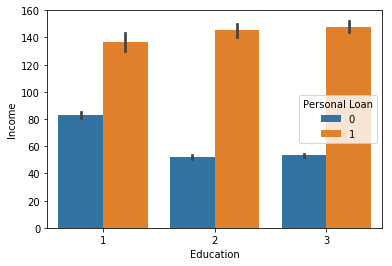

In [18]:
sns.barplot(x="Education",y="Income",hue="Personal Loan",data=bankData)

<span style="font-family: Arial;font-size:1em;color:Royalblue;"> People having Personal Loan as "1" has more income compared to "0" personal Loan

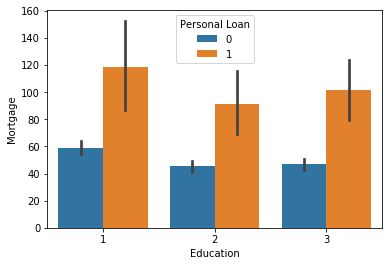

In [19]:
sns.barplot(x="Education", y='Mortgage', hue="Personal Loan", data=bankData)

<span style="font-family: Arial;font-size:1em;color:Royalblue;">Customer who has personal loan have high mortgage

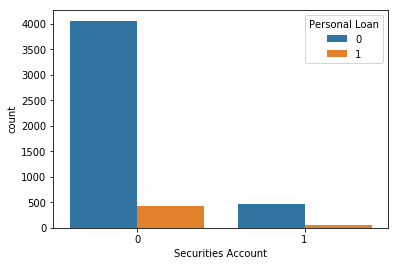

In [20]:
sns.countplot(x="Securities Account", data=bankData,hue="Personal Loan")

<span style="font-family: Arial;font-size:1em;color:Royalblue;"> people who have Personal Loans have less securities account

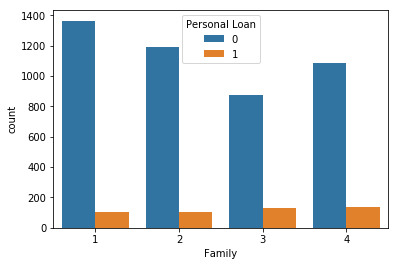

In [21]:
sns.countplot(x='Family',data=bankData,hue='Personal Loan')

<span style="font-family: Arial;font-size:1.5em;color:Red;"> Observation:
    
<span style="font-family: Arial;font-size:1em;color:Red;"> But it seems families with size of 3 and more have taken comparitively more loans

<span style="font-family: Arial;font-size:1em;color:Blue;"> Influence of CD account on Personal Loan

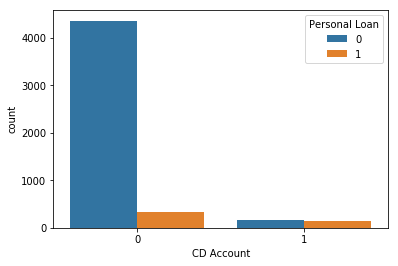

In [22]:
sns.countplot(x='CD Account',data=bankData,hue='Personal Loan')

<span style="font-family: Arial;font-size:1.5em;color:Red;">Observation:
    
<span style="font-family: Arial;font-size:1em;color:Red;"> All customers who have CD account has loan as well, while No loan no CD account

<span style="font-family: Arial;font-size:1em;color:Blue;">  Influence of Experience and Age on Education using scatter plot 

Text(0,0.5,'Age')

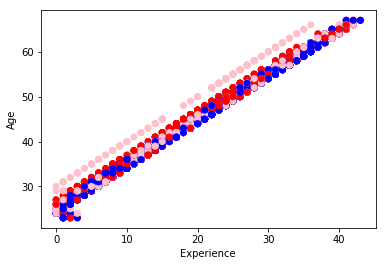

In [23]:
fig, ax = plt.subplots()
colors = {1:'blue',2:'red',3:'pink'}
ax.scatter(bankData['Experience'],bankData['Age'],c=bankData['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

<span style="font-family: Arial;font-size:1.5em;color:Red;"> Observation:
    
<span style="font-family: Arial;font-size:1em;color:Red;"> The above plot show with experience and age have a positive correlation. 
As experience increase age also increases. And the colors show the education level. 
There is gap in the mid forties of age and also more people in the under graduate level

<span style="font-family: Arial;font-size:1em;color:blue;"> 
Data Preparation

<span style="font-family: Arial;font-size:1em;color:blue;"> Check hidden missing values ,We fit the imputer  on the training data, and perform the imputer transformations on both the training and test datasets.

In [24]:
#from sklearn.impute import SimpleImputer
#imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
#imputer = imp_mean.fit(bankData.iloc[:,:-1])
#imputed_data = imputer.transform(bankData.iloc[:,:-1].values)
#bankData.iloc[:,:-1] = imputed_data

In [25]:
n_true = len(bankData.loc[bankData['Personal Loan'] == True])
n_false = len(bankData.loc[bankData['Personal Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (0.00%)
Number of false cases: 4520 (0.00%)


<span style="font-family: Arial;font-size:1.5em;color:Red;"> Observation:
    
<span style="font-family: Arial;font-size:1em;color:Red;"> 
So we have 9.60% people in current data set has Personal Loan and rest of 90.40% doesn't have  Personal Loan.

<span style="font-family: Arial;font-size:1.5em;color:Blue;"> Differenciating Feature and target data

In [26]:
bankData.drop('Personal Loan',axis=1)
bankData.drop('Experience',axis=1)
bankData.drop('ZIP Code',axis=1)
feature= bankData.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
target = bankData['Personal Loan']   # Predicted Personal Loan (1=True, 0=False) (1 X m)

<span style="font-family: Arial;font-size:1.5em;color:Blue;"> Scaling Data
    
<span style="font-family: Arial;font-size:1em;color:Blue;"> We fit the scaler on the training data, and perform the scaling transformations on both the training and test datasets.

In [27]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()
colscal=["CCAvg"]
mm.fit(feature[colscal])
# Fit and transform our feature data into a pandas dataframe
feature_scaled = pd.DataFrame(mm.fit_transform(feature[colscal]),columns=colscal)


feature =feature.drop(colscal,axis=1)
feature = feature_scaled.join(feature)


<span style="font-family: Arial;font-size:1.5em;color:Blue;"> 5.Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans
    
<span style="font-family: Arial;font-size:1em;color:Blue;">    Used following
    
<span style="font-family: Arial;font-size:1em;color:Blue;">    Logistic Regression
    
<span style="font-family: Arial;font-size:1em;color:Blue;">    K-NN
    
<span style="font-family: Arial;font-size:1em;color:Blue;">    Naive Bayes
    
<span style="font-family: Arial;font-size:1em;color:Blue;">    SVM

<span style="font-family: Arial;font-size:1.5em;color:Blue;"> 
Supervised Learning-Logistic Regression

 <span style="font-family: Arial;font-size:1.5em;color:Blue;">  4. Split the data into training and test set in the ratio of 70:30 respectively 

In [28]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=1)
# 1 is just any random seed number

X_train.head()

,CCAvg,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,0.13,47,22,35,94304,2,1,0,0,0,1,0
4768,0.20,38,14,39,93118,1,2,0,0,0,1,0
65,0.38,59,35,131,91360,1,1,0,0,0,1,1
177,0.18,29,3,65,94132,4,2,244,0,0,0,0
4489,0.02,39,13,21,95518,3,2,0,0,0,1,0


In [29]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(bankData.loc[bankData['Personal Loan'] == 1]), (len(bankData.loc[bankData['Personal Loan'] == 1])/len(bankData.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(bankData.loc[bankData['Personal Loan'] == 0]), (len(bankData.loc[bankData['Personal Loan'] == 0])/len(bankData.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (0.00%)
Original Personal Loan False Values   : 4520 (0.00%)

Training Personal Loan True Values    : 331 (0.00%)
Training Personal Loan False Values   : 3169 (0.00%)

Test Personal Loan True Values        : 149 (0.00%)
Test Personal Loan False Values       : 1351 (0.00%)



In [30]:
X_train.head()

,CCAvg,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,0.13,47,22,35,94304,2,1,0,0,0,1,0
4768,0.20,38,14,39,93118,1,2,0,0,0,1,0
65,0.38,59,35,131,91360,1,1,0,0,0,1,1
177,0.18,29,3,65,94132,4,2,244,0,0,0,0
4489,0.02,39,13,21,95518,3,2,0,0,0,1,0


In [31]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.001009 -0.000471 -0.002718  0.036312 -0.000066  0.016107  0.017465   

          7         8         9        10        11  intercept  
0  0.000826  0.000568  0.004967 -0.000189 -0.000071  -0.000112  


In [32]:
model_score = model.score(X_test, y_test)
print(model_score)

0.908


<span style="font-family: Arial;font-size:1.5em;color:Red;"> Observation:

<span style="font-family: Arial;font-size:1em;color:Red;">   
    We got 90.8% accuracy score, this is apt model. but we can compare with other models to find final efficient model
    
<span style="font-family: Arial;font-size:1em;color:Red;"> LR can be deployed to predict the likelihood of a liability customer buying personal loans

<span style="font-family: Arial;font-size:1.5em;color:Blue;"> 6.Print the confusion matrix for Logistic Regression

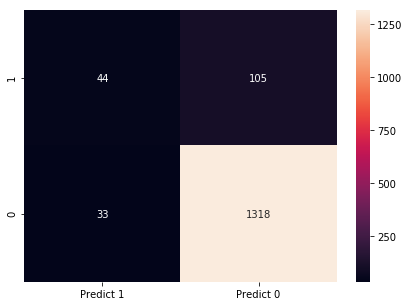

In [33]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt="d")

The confusion matrix

True Positives (TP): we correctly predicted that they do have personal Loan 9

True Negatives (TN): we correctly predicted that they don't have personal Loan 1318

False Positives (FP): we incorrectly predicted that they do have personal Loan (a "Type I error") 140 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have personal Loan (a "Type II error") 33 Falsely predict negative Type II error

<span style="font-family: Arial;font-size:1.5em;color:Blue;">Supervised Learning- Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
bank_model = GaussianNB()

bank_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
bank_train_predict = bank_model.predict(X_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, bank_train_predict)))
print()

Model Accuracy: 0.8960
()


In [36]:
bank_test_predict = bank_model.predict(X_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, bank_test_predict)))
print()

Model Accuracy: 0.8827
()


<span style="font-family: Arial;font-size:1.5em;color:Blue;">6.  Print the confusion matrix for Naive Bayes

Confusion Matrix


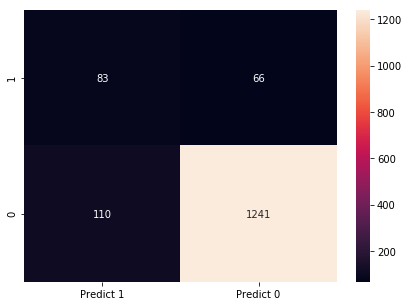

In [37]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, bank_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='d')

In [38]:
print("Classification Report")
print(metrics.classification_report(y_test, bank_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.43      0.56      0.49       149
           0       0.95      0.92      0.93      1351

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



<span style="font-family: Arial;font-size:1.5em;color:Red;"> Observation:

<span style="font-family: Arial;font-size:1em;color:Red;">   
    We got 89% accuracy score, which is high score and model can be considered, with 92% recall value, which means we have considered right cases for study
    
<span style="font-family: Arial;font-size:1em;color:Red;"> Naive base can be used for customer buying personal loans

<span style="font-family: Arial;font-size:1.5em;color:Blue;"> Supervised Learning- KNN 

In [39]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )


In [40]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [41]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8933333333333333

In [42]:
print(metrics.classification_report(y_test , predicted_labels))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1351
           1       0.42      0.21      0.28       149

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.67      0.59      0.61      1500
weighted avg       0.87      0.89      0.88      1500



<span style="font-family: Arial;font-size:1.5em;color:Red;"> Observation:

<span style="font-family: Arial;font-size:1em;color:Red;">   
    We got 89.3% accuracy score, this is apt model. but we can compare with other models to find final efficient model
    
<span style="font-family: Arial;font-size:1em;color:Red;"> K-NN can be deployed to predict the likelihood of a liability customer buying personal loans

<span style="font-family: Arial;font-size:1.5em;color:Blue;"> 6. Print the confusion matrix for KNN

Confusion Matrix


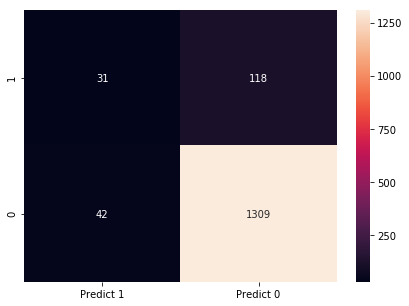

In [43]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='d')

<span style="font-family: Arial;font-size:1em;color:Blue;"> Choosing the K-Value
Choosing the right k is not easy and is subjective. Usually choose as an odd number is choosen.
A small k captures too much training noise and hence does not do well in test data. A very large k does so much smoothening that it does not manage to capture information in the training data sufficiently - and hence does not do well in test data.
If the number of classes is 2, many suggest a rule of thumb approach(set k=sqrt(n)), that might not be the best but does well mostly.

In [44]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [45]:
scores =[]
for k in neighbors:
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

In [46]:
# changing to misclassification error
MSE = [1 - x for x in scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


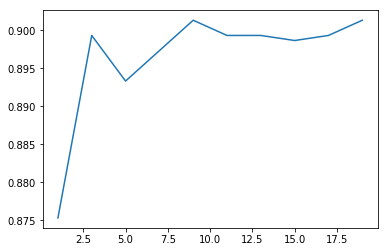

In [47]:
plt.plot(neighbors,scores)

<span style="font-family: Arial;font-size:1.5em;color:Blue;"> Supervised Learning-SVM

In [48]:
# Split X and y into training and test set in 70:30 ratio

#X_SVM_train, X_SVM_test, y_SVM_train, y_SVM_test = train_test_split(XScaled, target, test_size=0.30, random_state=1)

In [49]:
from sklearn import svm
from sklearn import metrics
svm1 = svm.SVC(verbose=True,gamma=0.025, C=3)
svm1.fit(X_train,y_train)

[LibSVM]

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [50]:

print("Accuracy on training set: {:.2f}".format(svm1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svm1.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.90


<span style="font-family: Arial;font-size:1em;color:Blue;"> By increasing C value we can increase the training set quality

In [51]:
from sklearn.svm import SVC
from sklearn import metrics
svm1 = SVC(verbose=True,gamma=0.025, C=1000)
svm1.fit(X_train,y_train)

[LibSVM]

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [52]:

print("Accuracy on training set: {:.2f}".format(svm1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svm1.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.90


In [53]:
y_pred = svm1.predict(X_test)

In [54]:
metrics.accuracy_score(y_test , y_pred)   # Calling getAccuracy function instead of usinig array comparison to get the accuracy

0.8993333333333333

In [55]:
print(metrics.classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.33      0.01      0.03       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.62      0.51      0.49      1500
weighted avg       0.85      0.90      0.86      1500



In [56]:
metrics.roc_auc_score(y_test,y_pred)

0.5052310244958992

<span style="font-family: Arial;font-size:1.5em;color:Red;"> Observation:

<span style="font-family: Arial;font-size:1em;color:Red;">   
    We got 90.0% accuracy score,also the area under the curve is about 50%, this is apt model. but we can compare with other models to find final efficient model
    
<span style="font-family: Arial;font-size:1em;color:Red;"> SVM can be deployed to predict the likelihood of a liability customer buying personal loans

<span style="font-family: Arial;font-size:1.5em;color:Blue;"> 6. Print the confusion matrix for SVM

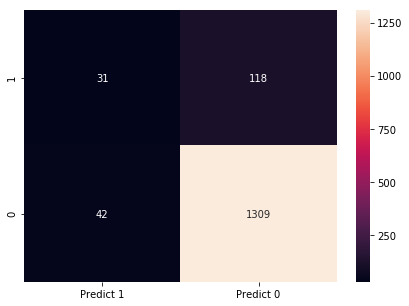

In [57]:
cmd = metrics.confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='d')

<span style="font-family: Arial;font-size:1.5em;color:Blue;"> 7. Modal Comparision with reasoning

In [58]:
X=feature
y=target

KNN: 0.899808 (0.015540)
NB: 0.888001 (0.016372)
SVM: 0.902010 (0.017211)
LR: 0.908404 (0.012727)


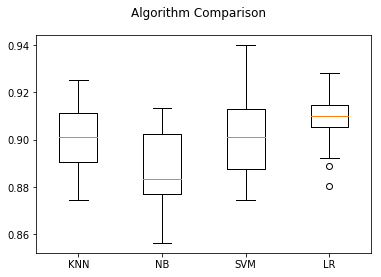

In [59]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma=0.025, C=1000)))
models.append(('LR', LogisticRegression(solver="liblinear")))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=15, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<span style="font-family: Arial;font-size:1.5em;color:red;"> Observation:
    
 <span style="font-family: Arial;font-size:1em;color:red;">   The aim of Bank (Thera Bank) is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study. From the above graph , it seems like Logistic Regression has the highest accuracy and we can choose that as our final model. there is small difference between SVM and Logistic Regression, would prefer Logistic Regression